Intermediate Programming with Data AE3 Project

4/16/2023

Introduction:
In this project, I am visualizing and analyzing data from my robot's IMU (Inertial Measurement Unit) sensor. Robots are used in a variety of scenarios, and IMU data is really important. This data includes data on acceleration values, velocities, and positions, and orientation (roll, pitch, yaw) data. My data generated in real-time by my robot's Adafruit 9-DOF Fusion Breakout IMU, and logged in a CSV file. My goals is to take the imu_data.csv file produced my robot, and break it down, and visualize it. This would allow me to visualize what the robot was doing after a run, and analyze it's behavior based on the data.

Data Sources: The csv data, imu_data.csv is produced real-time by the robot I built and programmed for the Northeastern University Robotics Club.

        Time  AccelX  AccelY  AccelZ  VelX  VelY  VelZ  PosX  PosY  PosZ  \
0   0.000674       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.016186       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.031479       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.048275       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.063296       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
5   0.079160       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
6   0.096933       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
7   0.114554       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
8   0.130118       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
9   0.147691       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
10  0.162795       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
11  0.179091       0       0       0   0.0   0.0   0.0   0.0   0.0   0.0   
12  0.197147

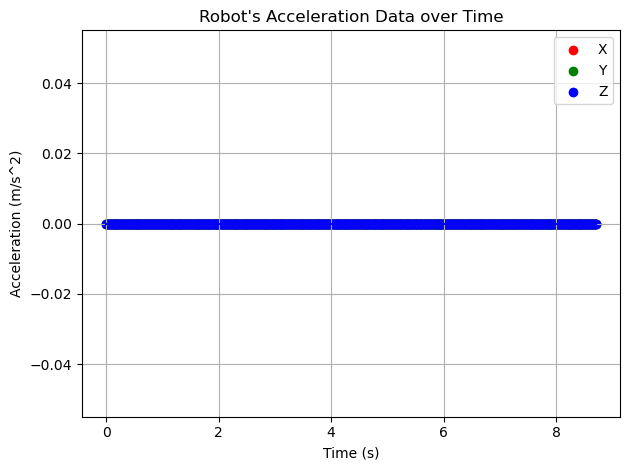

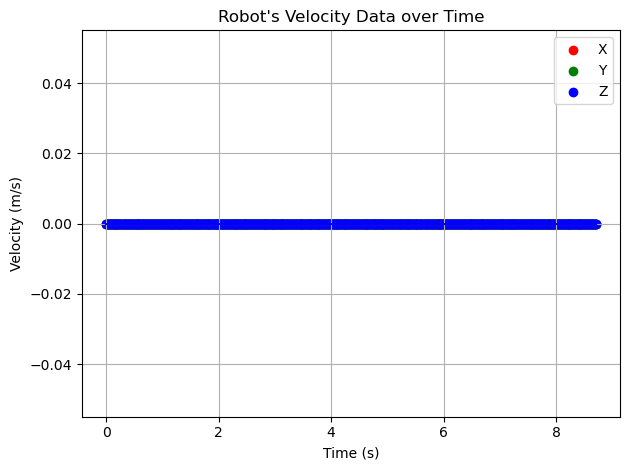

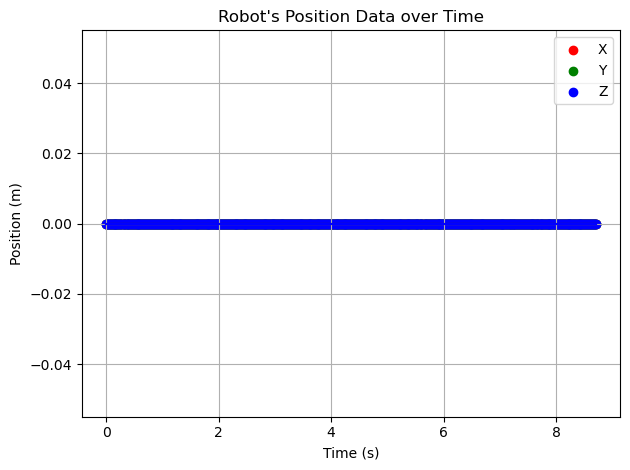

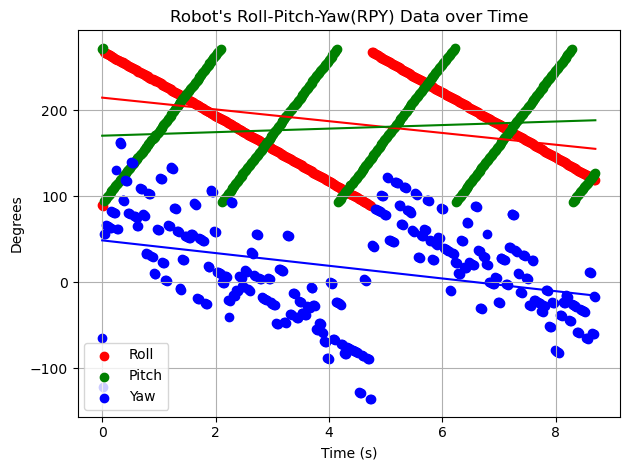

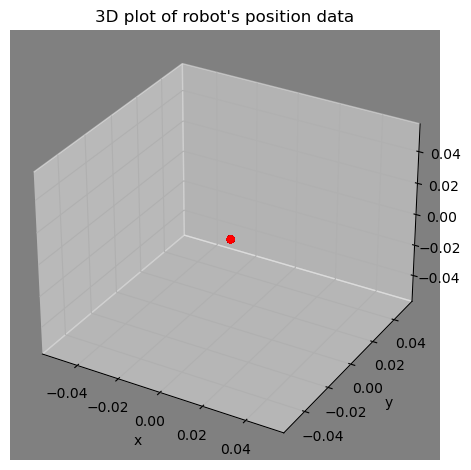

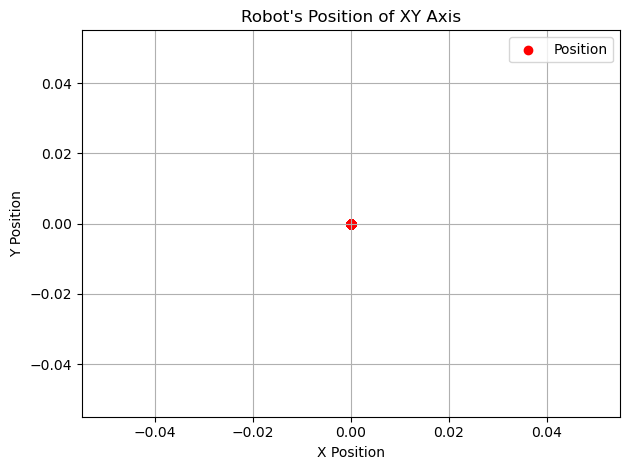

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
from sklearn.linear_model import LinearRegression

#create linear regression model
model = LinearRegression(fit_intercept=True)

#Get csv data from robot, and put it into a pandas dataframe
#headers are: ['Time','AccelX', 'AccelY','AccelZ', 'VelX', 'VelY', 'VelZ', 'PosX', 'PosY', 'PosZ', 'Roll', 'Pitch', 'Yaw']
df = pd.read_csv("./imu_data.csv", sep =',')

#sort the values by time in ascending order, as for some reason the data gets jumbled when outputted to the csv from the robot.
df.sort_values("Time", ascending=True, inplace=True)

#print out top 20 values to terminal
print(df.head(20))

#plot the acceleration data in a 2D plot:
fig, ax = plt.subplots()
ax.scatter(df["Time"], df["AccelX"], c='red', label='X')
ax.scatter(df["Time"], df["AccelY"],c='green', label='Y')
ax.scatter(df["Time"], df["AccelZ"],c='blue', label='Z')

# Fit a linear regression model to the acceleration data for each axis (X, Y, and Z)
model.fit(df["Time"].values.reshape(-1,1),df["AccelX"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='r')
model.fit(df["Time"].values.reshape(-1,1),df["AccelY"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='g')
model.fit(df["Time"].values.reshape(-1,1),df["AccelZ"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='b')

#set x and y labels
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')

#add a title for the plot
plt.title('Robot\'s Acceleration Data over Time')

#add grid lines
plt.grid()
#add a legend based off of the labels of the scatter plots
plt.legend()

#set the plot to be a tight layout
plt.tight_layout()

#display the plot
plt.show()


#plot the velocity data into a 2D plot
fig,ax = plt.subplots()
ax.scatter(df["Time"], df["VelX"], c='red', label='X')
ax.scatter(df["Time"], df["VelY"], c='green', label='Y')
ax.scatter(df["Time"], df["VelZ"], c='blue', label='Z')

# Fit a linear regression model to the velocity data for each axis (X, Y, and Z)
model.fit(df["Time"].values.reshape(-1,1),df["VelX"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='r')
model.fit(df["Time"].values.reshape(-1,1),df["VelY"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='g')
model.fit(df["Time"].values.reshape(-1,1),df["VelZ"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='b')

#add labels, title, gridlines, and a legend based off of labels like the previous plot
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Robot\'s Velocity Data over Time')
plt.grid()
plt.legend()

#set the plot to be a tight layout
plt.tight_layout()

#display the plot
plt.show()


#plot the position data into a 2D plot
fig,ax = plt.subplots()
ax.scatter(df["Time"], df["PosX"],c='red', label='X')
ax.scatter(df["Time"], df["PosY"], c='green', label='Y')
ax.scatter(df["Time"], df["PosZ"], c='blue', label='Z')


# Fit a linear regression model to the position data for each axis (X, Y, and Z)
model.fit(df["Time"].values.reshape(-1,1),df["PosX"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='r')
model.fit(df["Time"].values.reshape(-1,1),df["PosY"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='g')
model.fit(df["Time"].values.reshape(-1,1),df["PosZ"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='b')

#add labels, title, gridlines, and a legend based off of labels like the previous plot
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Robot\'s Position Data over Time')
plt.grid()
plt.legend()

#set the plot to be a tight layout
plt.tight_layout()

#display the plot
plt.show()


#plot the roll, pitch and yaw data into a 2D plot
fig,ax = plt.subplots()
ax.scatter(df["Time"], df["Roll"], c='red',label='Roll')
ax.scatter(df["Time"], df["Pitch"], c='green',label = 'Pitch')
ax.scatter(df["Time"], df["Yaw"], c='blue',label='Yaw')

# Fit a linear regression model to the RPY data for each axis (Roll, Pitch and Yaw)
model.fit(df["Time"].values.reshape(-1,1),df["Roll"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='r')
model.fit(df["Time"].values.reshape(-1,1),df["Pitch"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='g')
model.fit(df["Time"].values.reshape(-1,1),df["Yaw"].values.reshape(-1,1))
ax.plot(df["Time"].values.reshape(-1,1), model.predict(df["Time"].values.reshape(-1,1)), c='b')

#add labels, title, gridlines, and a legend based off of labels like the previous plot
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.title('Robot\'s Roll-Pitch-Yaw(RPY) Data over Time')
plt.grid()
plt.legend()

#set the plot to be a tight layout
plt.tight_layout()

#display the plot
plt.show()

#plot position data on a 3D plot
fig = plt.figure()
#set the projection of the axes to 3D
ax = plt.axes(projection='3d')

#set the background color of the plot
ax.set_facecolor(color=(0.5,0.5,0.5))

#load position data into x, y, and z variables from pandas dataframe
x = df["PosX"]
y = df["PosY"]
z = df["PosZ"]

#create a scatter plot of the the position data in the 3d plot
ax.scatter(x, y, z, marker='o', c='r')
# ax.plot(x, y, z, c='r')

#set lables for the x and y axis
ax.set_xlabel('x')
ax.set_ylabel('y')

#add a title for the plot.
ax.set_title("3D plot of robot's position data")

#set the plot to be a tight layout
plt.tight_layout()

#display the plot
plt.show()

#plot figure in 2D using just y and z axis of position data.
fig,ax = plt.subplots()

#create a scatterplot of the position data
ax.scatter(df["PosX"], df["PosY"], c='red',label='Position')
# ax.plot(df["PosY"], df["PosZ"], c='red')

#fit a linear regression model to the plot, to visualize the best fit line, this would be the path the robot is travelling in.
model.fit(df["PosX"].values.reshape(-1,1),df["PosY"].values.reshape(-1,1))
ax.plot(df["PosX"].values.reshape(-1,1), model.predict(df["PosX"].values.reshape(-1,1)), c='r')

#label the plot's x and y axis to reflect the position data being used
plt.xlabel('X Position')
plt.ylabel('Y Position')
#add a title to the plot
plt.title('Robot\'s Position of XY Axis')
#add grid lines
plt.grid()
#add a legend based on labels
plt.legend()
#set the plot to be a tight layout
plt.tight_layout()
#display the plot
plt.show()



    

Analysis:

Through visualizing the robot's Inertial Measurement Unit (IMU) data, exported as a csv and converted to a DataFrame using Pandas, we can see from the Acceleration Versus Time graph that the acceleration on all three axes can be fitted to linear regression model. At the surface, it seems like the Y and Z axis are experiencing a positive acceleration and the X axis is experiencing a negative acceleration of around -10. In this sense it would seem that the robot is experiencing forces on all three axis. But knowing that the robot is moving linearly (as the physical action of the robot was that it was moving in a straight line, and experiencing drag on one of the wheels causing it to turn to the right), on a 2D plane as opposed to in 3D space, we can realize that the -10 constant acceleration value is actually the force of GRAVITY! This would explain how the 3D graph makes no sense, as it looks like the position of the robot in the X axis is constantly decreasing. Thus, we can view the Y and Z axis as the two axes that the robot is moving on, and when viewing the linear regression of the position YZ data, we see that it is in fact moving mostly straight, although there is a large amount of noise with the IMU.

From the Roll Pitch Yaw graph, we can see that the roll remains mostly constant at around 300 degrees, the pitch changes from about -90 degrees to 90 degrees, and the yaw rises from about 180 degrees to about 240 degrees. However it is important to note that the imu is placed on it's side rather then flat, and not to assume the normal orientations of roll pitch and yaw. When flat, yaw would be the value that would change, however here, the change in yaw is not as significant as the change in pitch. We might then guess that the differences in yaw is a result of noise. Then in that sense, we can see that the robot is rotating around 180 degrees counter-clockwise as the pitch changes from 90 to -90 over the progression of time.

While I did visually see the robot turn as a result of wheels not spinning at the same speed, I do not believe the difference should have been as profound, meaning that the sensor is experiencing a lot of noise. 
If the robot was ran during the test for longer, we may have had different more accurate results.

Conclusion:

Visualizing data from sensors is extremely important for robotics, as it allows us to see what the robot THINKS that it is doing. This helps me debug the robot more effectively. Seeing where noise is affecting the robot allows me to realize where I would need to find ways to offset it, especially since IMUs experience a phenomenon known as sensor drift. Also, seeing where the robot is being affected by gravity allows me to know what are the axes that the robot is moving on. Thus, the significance of this visualization and analysis allows me to better understand what the robot is doing, and make any physical or software changes to reduce noise and drift accordingly.

References: N/A as the IMU_data is generated from running my robot. 